In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests as re
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

### Reading in TN County shapes

In [2]:
counties = gpd.read_file(r"C:\Users\jared\Desktop\nss\capstone\data\TIGER_Line_2018_Tennessee_Counties.geojson")
counties.head(5)

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Length,SHAPE_Area,geometry
0,30,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,...,16860,,A,1.404654e+09,86645833.0,+35.1634720,-085.2018432,1.988717,0.147573,"MULTIPOLYGON (((-85.29255 35.26292, -85.29239 ..."
1,65,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,...,16860,,A,1.290468e+09,36484703.0,+35.1334215,-085.6183990,1.631306,0.131228,"MULTIPOLYGON (((-85.54388 35.30238, -85.54187 ..."
2,68,47,185,01639800,47185,White,White County,06,H1,G4020,...,,,A,9.755921e+08,7113369.0,+35.9270486,-085.4557854,1.870463,0.098137,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,129,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,...,28940,,A,1.352440e+09,823018.0,+36.1386970,-084.6392616,1.906032,0.135494,"MULTIPOLYGON (((-84.79101 36.05854, -84.79185 ..."
4,182,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,...,28940,,A,1.243616e+09,46494677.0,+36.4015922,-084.1592495,2.054030,0.129608,"MULTIPOLYGON (((-84.32222 36.39287, -84.32249 ..."


### All dollar stores df

In [3]:
dollar_stores = pd.read_csv(r'C:\Users\jared\Desktop\nss\capstone\data\dollar_stores.csv')
dollar_stores

,Unnamed: 0,Longitude,Latitude,City,State,Zip,store
0,0,-87.066780,36.582896,Adams,TN,37010,Dollar General
1,1,-88.372241,35.232807,Adamsville,TN,38310,Dollar General
2,2,-82.709843,36.148669,Afton,TN,37616,Dollar General
3,3,-82.745609,36.270779,Afton,TN,37616,Dollar General
4,4,-89.136447,35.790506,Alamo,TN,38001,Dollar General
...,...,...,...,...,...,...,...
1264,1264,-86.215996,35.358601,Tullahoma,TN,37388,Family Dollar
1265,1265,-84.584863,36.102002,Wartburg,TN,37887,Family Dollar
1266,1266,-83.282542,36.106325,White Pine,TN,37890,Family Dollar
1267,1267,-83.339293,36.047745,White Pine,TN,37890,Family Dollar


In [4]:
dollar_stores = dollar_stores.drop(columns = ['Unnamed: 0'])
dollar_stores

,Longitude,Latitude,City,State,Zip,store
0,-87.066780,36.582896,Adams,TN,37010,Dollar General
1,-88.372241,35.232807,Adamsville,TN,38310,Dollar General
2,-82.709843,36.148669,Afton,TN,37616,Dollar General
3,-82.745609,36.270779,Afton,TN,37616,Dollar General
4,-89.136447,35.790506,Alamo,TN,38001,Dollar General
...,...,...,...,...,...,...
1264,-86.215996,35.358601,Tullahoma,TN,37388,Family Dollar
1265,-84.584863,36.102002,Wartburg,TN,37887,Family Dollar
1266,-83.282542,36.106325,White Pine,TN,37890,Family Dollar
1267,-83.339293,36.047745,White Pine,TN,37890,Family Dollar


### Giving dollar_stores a geometry column and converting to geodataframe

In [5]:
dollar_stores['geometry'] = dollar_stores.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
dollar_stores.head(3)

C:\Users\jared\anaconda3\envs\geospatial_ds6\lib\site-packages\pandas\core\dtypes\cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Longitude,Latitude,City,State,Zip,store,geometry
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.582896)
1,-88.372241,35.232807,Adamsville,TN,38310,Dollar General,POINT (-88.372241 35.232807)
2,-82.709843,36.148669,Afton,TN,37616,Dollar General,POINT (-82.7098431 36.1486686)


In [6]:
dollar_stores_geo = gpd.GeoDataFrame(dollar_stores, 
                           crs = counties.crs, 
                           geometry = dollar_stores['geometry'])

In [7]:
type(dollar_stores_geo)

geopandas.geodataframe.GeoDataFrame

In [8]:
counties = counties[['NAMELSAD','geometry']]
counties

,NAMELSAD,geometry
0,Hamilton County,"MULTIPOLYGON (((-85.29255 35.26292, -85.29239 ..."
1,Marion County,"MULTIPOLYGON (((-85.54388 35.30238, -85.54187 ..."
2,White County,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,Morgan County,"MULTIPOLYGON (((-84.79101 36.05854, -84.79185 ..."
4,Campbell County,"MULTIPOLYGON (((-84.32222 36.39287, -84.32249 ..."
...,...,...
90,Decatur County,"MULTIPOLYGON (((-88.18739 35.66371, -88.18738 ..."
91,Maury County,"MULTIPOLYGON (((-87.31715 35.55287, -87.31705 ..."
92,Fayette County,"MULTIPOLYGON (((-89.63774 35.17934, -89.63768 ..."
93,Hamblen County,"MULTIPOLYGON (((-83.38984 36.26275, -83.38940 ..."


### Geospatial join

In [9]:
dollar_stores_by_county = gpd.sjoin(dollar_stores_geo, counties, op = 'within')

C:\Users\jared\anaconda3\envs\geospatial_ds6\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [10]:
dollar_stores_by_county

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,NAMELSAD
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County
83,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County
200,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County
201,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County
307,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County
...,...,...,...,...,...,...,...,...,...
834,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County
1255,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County
803,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County
836,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County


### Count of dollar stores by county

In [11]:
count_by_county = dollar_stores_by_county['NAMELSAD'].value_counts()
count_by_county

NAMELSAD
Shelby County        144
Davidson County       76
Hamilton County       59
Knox County           58
Rutherford County     40
                    ... 
Pickett County         2
Lake County            2
Moore County           1
Trousdale County       1
Van Buren County       1
Name: count, Length: 95, dtype: int64

count_by_county = pd.DataFrame(count_by_county)

In [12]:
count_by_county.tail(5)

NAMELSAD
Pickett County      2
Lake County         2
Moore County        1
Trousdale County    1
Van Buren County    1
Name: count, dtype: int64

### Merging count per county column onto dollar stores df

In [13]:
Count_Merge = pd.merge(dollar_stores_by_county, count_by_county,  how='inner', left_on=['NAMELSAD'], right_on = ['NAMELSAD'])
Count_Merge

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,NAMELSAD,count
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County,17
1,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County,17
2,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County,17
3,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County,17
4,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County,17
...,...,...,...,...,...,...,...,...,...,...
1264,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County,3
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County,3
1266,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County,1
1267,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County,2


In [14]:
Count_Merge = Count_Merge.rename(columns = {'NAMELSAD':'County'})

In [15]:
Count_Merge

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,County,count
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County,17
1,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County,17
2,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County,17
3,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County,17
4,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County,17
...,...,...,...,...,...,...,...,...,...,...
1264,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County,3
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County,3
1266,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County,1
1267,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County,2


In [16]:
Count_Merge['County'] = Count_Merge['County'].replace('DeKalb County','De Kalb County')

### Importing, cleaning, and joining metrics to dollar store locations df

In [17]:
obesity = pd.read_csv(r'C:\Users\jared\Desktop\nss\capstone\data\DiabetesAtlas_CountyData.csv')
obesity

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Madison County,Tennessee,47113,40.2,35.6,44.7
1,Bradley County,Tennessee,47011,37.6,31.5,43.7
2,Henderson County,Tennessee,47077,37.1,28.7,45.0
3,Rutherford County,Tennessee,47149,37.1,31.4,42.5
4,Hardeman County,Tennessee,47069,36.7,27.0,47.0
...,...,...,...,...,...,...
90,Moore County,Tennessee,47127,19.0,10.1,31.4
91,Van Buren County,Tennessee,47175,18.6,10.2,29.1
92,Houston County,Tennessee,47083,18.0,9.9,28.9
93,Trousdale County,Tennessee,47169,18.0,10.0,28.9


In [18]:
obesity = obesity.drop(columns = ["State","CountyFIPS","Lower Limit"," Upper Limit"])

In [19]:
obesity['County'] = obesity['County'].replace('Dekalb County','De Kalb County')
obesity['County'] = obesity['County'].replace('Mcnairy County','McNairy County')
obesity['County'] = obesity['County'].replace('Mcminn County','McMinn County')

In [20]:
obesity

,County,Percentage
0,Madison County,40.2
1,Bradley County,37.6
2,Henderson County,37.1
3,Rutherford County,37.1
4,Hardeman County,36.7
...,...,...
90,Moore County,19.0
91,Van Buren County,18.6
92,Houston County,18.0
93,Trousdale County,18.0


In [21]:
metrics = pd.read_csv(r'C:\Users\jared\Desktop\nss\capstone\data\all_metrics.csv')
metrics

,Unnamed: 0,County,Population,Median_Income,YEAR,Poverty_Rate
0,0,"Meigs County, Tennessee",12758,49242,2020,16.0
1,1,"Montgomery County, Tennessee",220069,60779,2020,10.8
2,2,"Moore County, Tennessee",6461,64271,2020,9.8
3,3,"Obion County, Tennessee",30787,45643,2020,15.1
4,4,"Overton County, Tennessee",22511,43167,2020,16.3
...,...,...,...,...,...,...
90,90,"McMinn County, Tennessee",53276,50297,2020,14.0
91,91,"McNairy County, Tennessee",25866,44341,2020,15.0
92,92,"Madison County, Tennessee",98823,47580,2020,22.2
93,93,"Marion County, Tennessee",28837,50941,2020,14.7


In [22]:
metrics['County'] = metrics['County'].str.replace(', Tennessee','')
metrics

,Unnamed: 0,County,Population,Median_Income,YEAR,Poverty_Rate
0,0,Meigs County,12758,49242,2020,16.0
1,1,Montgomery County,220069,60779,2020,10.8
2,2,Moore County,6461,64271,2020,9.8
3,3,Obion County,30787,45643,2020,15.1
4,4,Overton County,22511,43167,2020,16.3
...,...,...,...,...,...,...
90,90,McMinn County,53276,50297,2020,14.0
91,91,McNairy County,25866,44341,2020,15.0
92,92,Madison County,98823,47580,2020,22.2
93,93,Marion County,28837,50941,2020,14.7


In [23]:
metrics = metrics.drop(columns = ["Unnamed: 0","YEAR"])

In [24]:
metrics.loc[metrics['County'] == 'DeKalb County']

,County,Population,Median_Income,Poverty_Rate
61,DeKalb County,20080,51002,17.5


In [25]:
metrics['County'] = metrics['County'].replace('DeKalb County','De Kalb County')

In [26]:
metrics.loc[metrics['County'] == 'De Kalb County']

,County,Population,Median_Income,Poverty_Rate
61,De Kalb County,20080,51002,17.5


In [27]:
metrics

,County,Population,Median_Income,Poverty_Rate
0,Meigs County,12758,49242,16.0
1,Montgomery County,220069,60779,10.8
2,Moore County,6461,64271,9.8
3,Obion County,30787,45643,15.1
4,Overton County,22511,43167,16.3
...,...,...,...,...
90,McMinn County,53276,50297,14.0
91,McNairy County,25866,44341,15.0
92,Madison County,98823,47580,22.2
93,Marion County,28837,50941,14.7


In [28]:
Food_Insecurity = pd.read_csv(r"C:\Users\jared\Desktop\nss\capstone\data\food insecurity.csv")


In [29]:
Food_Insecurity = Food_Insecurity.drop(columns = ['# Food Insecure','# Limited Access to Healthy Foods','% Limited Access to Healthy Foods'])

In [30]:
Food_Insecurity

,County,% Food Insecure
0,Anderson County,15
1,Bedford County,13
2,Benton County,17
3,Bledsoe County,18
4,Blount County,11
...,...,...
90,Wayne County,14
91,Weakley County,15
92,White County,14
93,Williamson County,6


### Merging clean metrics onto dollar store locations df

In [31]:
Count_Merge = pd.merge(Count_Merge, metrics,  how='left', left_on=['County'], right_on = ['County'])
Count_Merge

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,County,count,Population,Median_Income,Poverty_Rate
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County,17,72803,63918,9.2
1,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County,17,72803,63918,9.2
2,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County,17,72803,63918,9.2
3,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County,17,72803,63918,9.2
4,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County,17,72803,63918,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County,3,6662,33109,28.6
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County,3,6662,33109,28.6
1266,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County,1,6168,45908,16.1
1267,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County,2,7005,32163,36.4


In [32]:
Count_Merge = pd.merge(Count_Merge, obesity,  how='left', left_on=['County'], right_on = ['County'])
Count_Merge

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,County,count,Population,Median_Income,Poverty_Rate,Percentage
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County,17,72803,63918,9.2,25.6
1,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County,17,72803,63918,9.2,25.6
2,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County,17,72803,63918,9.2,25.6
3,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County,17,72803,63918,9.2,25.6
4,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County,17,72803,63918,9.2,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County,3,6662,33109,28.6,20.9
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County,3,6662,33109,28.6,20.9
1266,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County,1,6168,45908,16.1,18.6
1267,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County,2,7005,32163,36.4,17.8


In [33]:
Count_Merge = pd.merge(Count_Merge, Food_Insecurity,  how='left', left_on=['County'], right_on = ['County'])
Count_Merge

,Longitude,Latitude,City,State,Zip,store,geometry,index_right,County,count,Population,Median_Income,Poverty_Rate,Percentage,% Food Insecure
0,-87.066780,36.582896,Adams,TN,37010,Dollar General,POINT (-87.06678 36.58290),61,Robertson County,17,72803,63918,9.2,25.6,11
1,-86.994422,36.554080,Cedar Hill,TN,37032,Dollar General,POINT (-86.99442 36.55408),61,Robertson County,17,72803,63918,9.2,25.6,11
2,-86.693908,36.548279,Cross Plains,TN,37049,Dollar General,POINT (-86.69391 36.54828),61,Robertson County,17,72803,63918,9.2,25.6,11
3,-86.640093,36.527315,Cross Plains,TN,37049,Dollar General,POINT (-86.64009 36.52731),61,Robertson County,17,72803,63918,9.2,25.6,11
4,-86.768290,36.396640,Goodlettsville,TN,37072,Dollar General,POINT (-86.76829 36.39664),61,Robertson County,17,72803,63918,9.2,25.6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,-83.227696,36.423880,Thorn Hill,TN,37881,Dollar General,POINT (-83.22770 36.42388),55,Hancock County,3,6662,33109,28.6,20.9,22
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),55,Hancock County,3,6662,33109,28.6,20.9,22
1266,-85.457235,35.750996,Spencer,TN,38585,Dollar General,POINT (-85.45723 35.75100),38,Van Buren County,1,6168,45908,16.1,18.6,17
1267,-89.468406,36.367422,Tiptonville,TN,38079,Dollar General,POINT (-89.46841 36.36742),19,Lake County,2,7005,32163,36.4,17.8,21


In [34]:
Count_Merge = Count_Merge.drop(columns = ["index_right"])

In [35]:
Count_Merge = Count_Merge.rename(columns = {'count':'County_Store_Count', 'Median_Income':'hh_med_inc','Percentage':'Obesity_Rate'})

In [36]:
Count_Merge['Stores_Per_Capita'] = Count_Merge['County_Store_Count'] / Count_Merge['Population']
Count_Merge.sort_values(by = 'Stores_Per_Capita', ascending = False)

,Longitude,Latitude,City,State,Zip,store,geometry,County,County_Store_Count,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_Capita
654,-85.624756,36.593556,Moss,TN,38575,Dollar General,POINT (-85.62476 36.59356),Clay County,4,7581,37683,21.0,19.8,19,0.000528
653,-85.483407,36.526805,Celina,TN,38551,Dollar General,POINT (-85.48341 36.52681),Clay County,4,7581,37683,21.0,19.8,19,0.000528
655,-85.778687,36.577637,Red Boiling Springs,TN,37150,Dollar General,POINT (-85.77869 36.57764),Clay County,4,7581,37683,21.0,19.8,19,0.000528
656,-85.505147,36.548524,Celina,TN,38551,Family Dollar,POINT (-85.50515 36.54852),Clay County,4,7581,37683,21.0,19.8,19,0.000528
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),Hancock County,3,6662,33109,28.6,20.9,22,0.000450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,-86.674650,35.963047,Nolensville,TN,37135,Dollar General,POINT (-86.67465 35.96305),Williamson County,9,247726,118257,4.1,25.9,6,0.000036
1044,-86.831899,35.915770,Franklin,TN,37064,Dollar General,POINT (-86.83190 35.91577),Williamson County,9,247726,118257,4.1,25.9,6,0.000036
1043,-87.135252,35.962482,Fairview,TN,37062,Dollar General,POINT (-87.13525 35.96248),Williamson County,9,247726,118257,4.1,25.9,6,0.000036
1042,-87.170357,36.023571,Fairview,TN,37062,Dollar General,POINT (-87.17036 36.02357),Williamson County,9,247726,118257,4.1,25.9,6,0.000036


In [37]:
Count_Merge['Stores_Per_10k'] = Count_Merge['Stores_Per_Capita'] * 10000
Count_Merge.sort_values(by = "Stores_Per_10k", ascending = False)

,Longitude,Latitude,City,State,Zip,store,geometry,County,County_Store_Count,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_Capita,Stores_Per_10k
654,-85.624756,36.593556,Moss,TN,38575,Dollar General,POINT (-85.62476 36.59356),Clay County,4,7581,37683,21.0,19.8,19,0.000528,5.276349
653,-85.483407,36.526805,Celina,TN,38551,Dollar General,POINT (-85.48341 36.52681),Clay County,4,7581,37683,21.0,19.8,19,0.000528,5.276349
655,-85.778687,36.577637,Red Boiling Springs,TN,37150,Dollar General,POINT (-85.77869 36.57764),Clay County,4,7581,37683,21.0,19.8,19,0.000528,5.276349
656,-85.505147,36.548524,Celina,TN,38551,Family Dollar,POINT (-85.50515 36.54852),Clay County,4,7581,37683,21.0,19.8,19,0.000528,5.276349
1265,-83.216687,36.517798,Sneedville,TN,37869,Family Dollar,POINT (-83.21669 36.51780),Hancock County,3,6662,33109,28.6,20.9,22,0.000450,4.503152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,-86.674650,35.963047,Nolensville,TN,37135,Dollar General,POINT (-86.67465 35.96305),Williamson County,9,247726,118257,4.1,25.9,6,0.000036,0.363305
1044,-86.831899,35.915770,Franklin,TN,37064,Dollar General,POINT (-86.83190 35.91577),Williamson County,9,247726,118257,4.1,25.9,6,0.000036,0.363305
1043,-87.135252,35.962482,Fairview,TN,37062,Dollar General,POINT (-87.13525 35.96248),Williamson County,9,247726,118257,4.1,25.9,6,0.000036,0.363305
1042,-87.170357,36.023571,Fairview,TN,37062,Dollar General,POINT (-87.17036 36.02357),Williamson County,9,247726,118257,4.1,25.9,6,0.000036,0.363305


## Exploratory Data Analysis

In [38]:
count_by_county = count_by_county.reset_index()

In [39]:
count_by_county = count_by_county.rename(columns = {'NAMELSAD':'County','count':'Dollar Stores'})

In [40]:
count_by_county_w_metrics = pd.merge(count_by_county, metrics,  how='inner', left_on=['County'], right_on = ['County'])

In [41]:
count_by_county_w_metrics

,County,Dollar Stores,Population,Median_Income,Poverty_Rate
0,Shelby County,144,929744,50870,19.1
1,Davidson County,76,715884,64418,12.8
2,Hamilton County,59,366207,61478,13.3
3,Knox County,58,478971,57886,10.9
4,Rutherford County,40,341486,73980,8.8
...,...,...,...,...,...
89,Pickett County,2,5001,40120,16.5
90,Lake County,2,7005,32163,36.4
91,Moore County,1,6461,64271,9.8
92,Trousdale County,1,11615,54970,15.4


In [42]:
count_by_county_w_metrics = pd.merge(count_by_county_w_metrics, obesity,  how='left', left_on=['County'], right_on = ['County'])

In [43]:
count_by_county_w_metrics = pd.merge(count_by_county_w_metrics, Food_Insecurity,  how='left', left_on=['County'], right_on = ['County'])

In [44]:
count_by_county_w_metrics

,County,Dollar Stores,Population,Median_Income,Poverty_Rate,Percentage,% Food Insecure
0,Shelby County,144,929744,50870,19.1,34.1,14
1,Davidson County,76,715884,64418,12.8,28.8,12
2,Hamilton County,59,366207,61478,13.3,30.1,12
3,Knox County,58,478971,57886,10.9,32.8,11
4,Rutherford County,40,341486,73980,8.8,37.1,10
...,...,...,...,...,...,...,...
89,Pickett County,2,5001,40120,16.5,20.6,16
90,Lake County,2,7005,32163,36.4,17.8,21
91,Moore County,1,6461,64271,9.8,19.0,10
92,Trousdale County,1,11615,54970,15.4,18.0,11


In [45]:
one_metric = Count_Merge[['County','Stores_Per_10k']]
one_metric

,County,Stores_Per_10k
0,Robertson County,2.335069
1,Robertson County,2.335069
2,Robertson County,2.335069
3,Robertson County,2.335069
4,Robertson County,2.335069
...,...,...
1264,Hancock County,4.503152
1265,Hancock County,4.503152
1266,Van Buren County,1.621271
1267,Lake County,2.855103


In [46]:
one_metric = one_metric.groupby(one_metric['County']).mean()
one_metric

,Stores_Per_10k
County,
Anderson County,1.815282
Bedford County,1.990565
Benton County,3.782148
Bledsoe County,2.682224
Blount County,1.478415
...,...
Wayne County,3.696402
Weakley County,2.735396
White County,2.559321


### Count of dollar stores by County w all metrics

In [47]:
count_by_county_w_metrics = pd.merge(count_by_county_w_metrics, one_metric,  how='left', left_on=['County'], right_on = ['County'])
count_by_county_w_metrics

,County,Dollar Stores,Population,Median_Income,Poverty_Rate,Percentage,% Food Insecure,Stores_Per_10k
0,Shelby County,144,929744,50870,19.1,34.1,14,1.548813
1,Davidson County,76,715884,64418,12.8,28.8,12,1.061625
2,Hamilton County,59,366207,61478,13.3,30.1,12,1.611111
3,Knox County,58,478971,57886,10.9,32.8,11,1.210929
4,Rutherford County,40,341486,73980,8.8,37.1,10,1.171351
...,...,...,...,...,...,...,...,...
89,Pickett County,2,5001,40120,16.5,20.6,16,3.999200
90,Lake County,2,7005,32163,36.4,17.8,21,2.855103
91,Moore County,1,6461,64271,9.8,19.0,10,1.547748
92,Trousdale County,1,11615,54970,15.4,18.0,11,0.860956


In [48]:
count_by_county_w_metrics = count_by_county_w_metrics.rename(columns = {'Median_Income':'hh_med_inc','Percentage':'Obesity_Rate'})

### Top 5 counties with most dollar stores, correlated to population

In [49]:
count_by_county_w_metrics.sort_values(by = "Dollar Stores", ascending = False).head(5)

,County,Dollar Stores,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_10k
0,Shelby County,144,929744,50870,19.1,34.1,14,1.548813
1,Davidson County,76,715884,64418,12.8,28.8,12,1.061625
2,Hamilton County,59,366207,61478,13.3,30.1,12,1.611111
3,Knox County,58,478971,57886,10.9,32.8,11,1.210929
4,Rutherford County,40,341486,73980,8.8,37.1,10,1.171351


### Top 5 counties with most dollar stores relative to population

In [50]:
count_by_county_w_metrics.sort_values(by = "Stores_Per_10k", ascending = False).head(5)

,County,Dollar Stores,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_10k
78,Clay County,4,7581,37683,21.0,19.8,19,5.276349
83,Hancock County,3,6662,33109,28.6,20.9,22,4.503152
66,Grundy County,6,13529,41133,18.2,27.6,18,4.434918
62,Crockett County,6,13911,50046,15.2,22.7,13,4.313133
29,Giles County,13,30346,51332,12.5,29.4,14,4.283925


In [51]:
count_by_county_w_metrics.sort_values(by = "Stores_Per_10k", ascending = False).tail(5)

,County,Dollar Stores,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_10k
3,Knox County,58,478971,57886,10.9,32.8,11,1.210929
4,Rutherford County,40,341486,73980,8.8,37.1,10,1.171351
1,Davidson County,76,715884,64418,12.8,28.8,12,1.061625
92,Trousdale County,1,11615,54970,15.4,18.0,11,0.860956
50,Williamson County,9,247726,118257,4.1,25.9,6,0.363305


In [52]:
metrics_corr = count_by_county_w_metrics.drop(columns =['County']).corr()

In [53]:
metrics_corr

,Dollar Stores,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_10k
Dollar Stores,1.000000,0.959491,0.218196,-0.145678,0.381158,-0.269444,-0.351289
Population,0.959491,1.000000,0.341226,-0.204253,0.315357,-0.350645,-0.458651
hh_med_inc,0.218196,0.341226,1.000000,-0.775352,0.118050,-0.825418,-0.553703
Poverty_Rate,-0.145678,-0.204253,-0.775352,1.000000,-0.198269,0.799712,0.413934
Obesity_Rate,0.381158,0.315357,0.118050,-0.198269,1.000000,-0.227733,-0.228276
% Food Insecure,-0.269444,-0.350645,-0.825418,0.799712,-0.227733,1.000000,0.525805
Stores_Per_10k,-0.351289,-0.458651,-0.553703,0.413934,-0.228276,0.525805,1.000000


### Brands

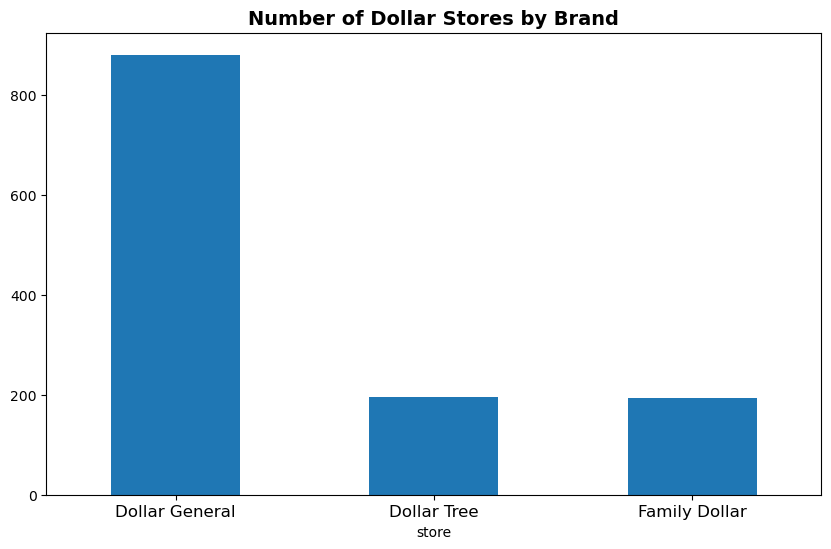

In [54]:
Count_Merge['store'].value_counts().plot(kind = 'bar',
                                        figsize = (10,6))                         

plt.xticks(rotation = 0,                                                
           fontsize = 12)                   
plt.title('Number of Dollar Stores by Brand',                              
         fontsize = 14,
         fontweight = 'bold');

In [55]:
pd.crosstab(Count_Merge['County'], Count_Merge['store']).tail(50)

store,Dollar General,Dollar Tree,Family Dollar
County,,,
Johnson County,5,0,0
Knox County,37,15,6
Lake County,1,0,1
Lauderdale County,4,1,1
Lawrence County,11,1,0
Lewis County,2,1,1
Lincoln County,8,1,1
Loudon County,7,2,1
Macon County,4,0,0


### .526 correlation between Food Insecurity and Stores per 10,000 people

Text(0, 0.5, 'Stores_Per_10k')

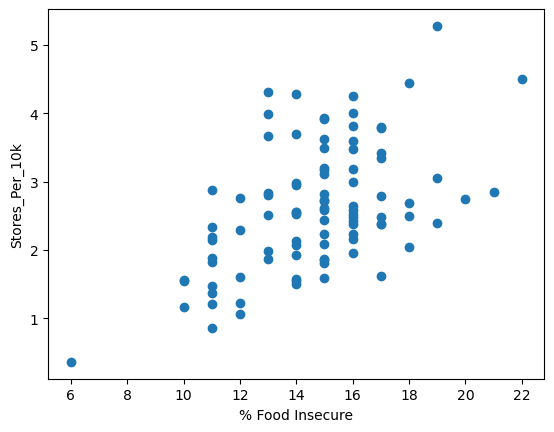

In [56]:
plt.scatter(data = count_by_county_w_metrics, x = '% Food Insecure', y = 'Stores_Per_10k')
plt.xlabel('% Food Insecure')
plt.ylabel('Stores_Per_10k')

### -0.553 correlation between household median income and Stores per 10,000 people

Text(0, 0.5, 'Stores_Per_10k')

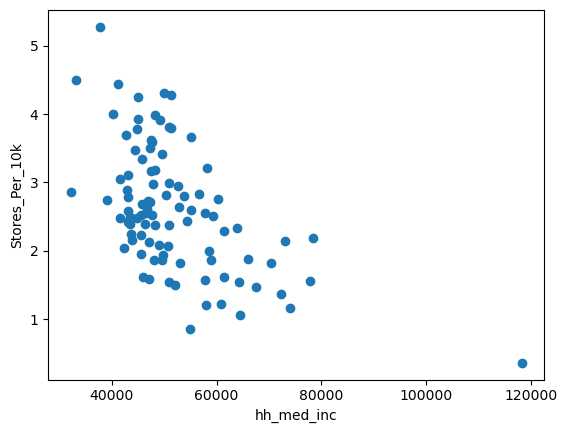

In [57]:
plt.scatter(data = count_by_county_w_metrics, x = 'hh_med_inc', y = 'Stores_Per_10k')
plt.xlabel('hh_med_inc')
plt.ylabel('Stores_Per_10k')

### -0.229 correlation between Obesity Rate and Stores per 10,000 people

Text(0, 0.5, 'Stores_Per_10k')

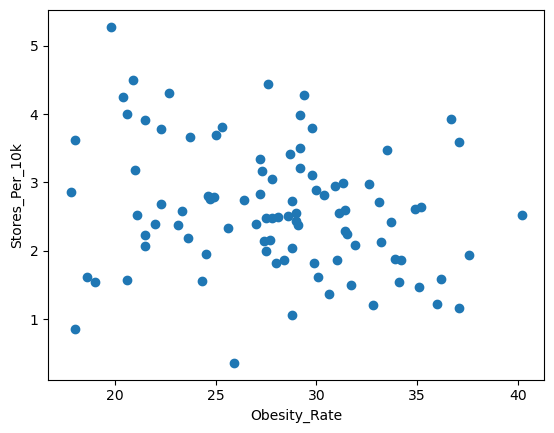

In [58]:
plt.scatter(data = count_by_county_w_metrics, x = 'Obesity_Rate', y = 'Stores_Per_10k')
plt.xlabel('Obesity_Rate')
plt.ylabel('Stores_Per_10k')

### 0.413 correlation between Poverty Rate and Stores per 10,000 people

Text(0, 0.5, 'Stores_Per_10k')

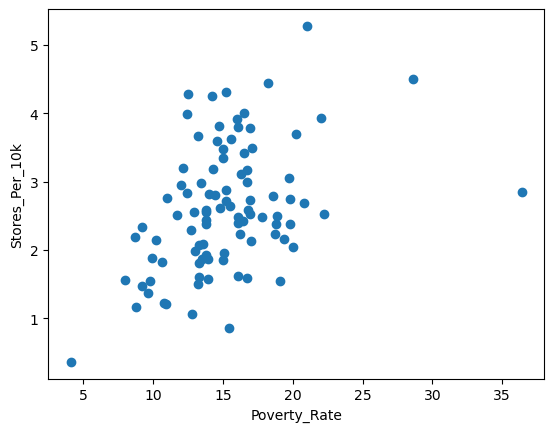

In [59]:
plt.scatter(data = count_by_county_w_metrics, x = 'Poverty_Rate', y = 'Stores_Per_10k')
plt.xlabel('Poverty_Rate')
plt.ylabel('Stores_Per_10k')

In [60]:
Count_Merge.loc[Count_Merge['County'] == 'McMinn County']

,Longitude,Latitude,City,State,Zip,store,geometry,County,County_Store_Count,Population,hh_med_inc,Poverty_Rate,Obesity_Rate,% Food Insecure,Stores_Per_Capita,Stores_Per_10k
380,-84.592307,35.482783,Athens,TN,37303,Dollar General,POINT (-84.59231 35.48278),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
381,-84.583084,35.412101,Athens,TN,37303,Dollar General,POINT (-84.58308 35.41210),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
382,-84.621982,35.450252,Athens,TN,37303,Dollar General,POINT (-84.62198 35.45025),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
383,-84.589576,35.436877,Athens,TN,37303,Dollar General,POINT (-84.58958 35.43688),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
384,-84.546201,35.271522,Delano,TN,37325,Dollar General,POINT (-84.54620 35.27152),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
385,-84.474750,35.432198,Englewood,TN,37329,Dollar General,POINT (-84.47475 35.43220),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
386,-84.522839,35.327621,Etowah,TN,37331,Dollar General,POINT (-84.52284 35.32762),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
387,-84.523952,35.339959,Etowah,TN,37331,Dollar General,POINT (-84.52395 35.33996),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
388,-84.561382,35.506056,Niota,TN,37826,Dollar General,POINT (-84.56138 35.50606),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527
389,-84.650343,35.289763,Riceville,TN,37370,Dollar General,POINT (-84.65034 35.28976),McMinn County,15,53276,50297,14.0,30.4,15,0.000282,2.815527


In [61]:
#Count_Merge.to_csv(r'C:\Users\jared\Desktop\nss\capstone\data\dollar_stores_geo_2.csv', index=False)

In [62]:
#count_by_county_w_metrics.to_csv(r'C:\Users\jared\Desktop\nss\capstone\data\count_by_county_geo_2.csv', index=False)